# Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import subprocess

subprocess.run(
    ['wget', 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip', '-P', './data/']
)
subprocess.run(
    ['unzip', './data/annotations_trainval2014.zip', '-d', './data/trainval2014/']
)

subprocess.run([
    'wget', 'http://images.cocodataset.org/annotations/image_info_test2014.zip', '-P', './data/'
])

subprocess.run([
    'unzip', './data/image_info_test2014.zip', '-d', './data/test2014/'
])

--2024-06-24 18:11:34--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.196.201, 52.217.167.137, 52.217.235.41, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.196.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘./data/annotations_trainval2014.zip.1’

     0K .......... .......... .......... .......... ..........  0%  139K 29m41s
    50K .......... .......... .......... .......... ..........  0%  278K 22m15s
   100K .......... .......... .......... .......... ..........  0%  277K 19m47s
   150K .......... .......... .......... .......... ..........  0% 35.0M 14m52s
   200K .......... .......... .......... .......... ..........  0%  276K 14m53s
   250K .......... .......... .......... .......... ..........  0% 32.8M 12m25s
   300K .......... .......... .......... .......... ..........  0% 60.8M 10

Archive:  ./data/annotations_trainval2014.zip
  inflating: ./data/trainval2014/annotations/instances_train2014.json  
  inflating: ./data/trainval2014/annotations/instances_val2014.json  
  inflating: ./data/trainval2014/annotations/person_keypoints_train2014.json  
  inflating: ./data/trainval2014/annotations/person_keypoints_val2014.json  
  inflating: ./data/trainval2014/annotations/captions_train2014.json  
  inflating: ./data/trainval2014/annotations/captions_val2014.json  


--2024-06-24 18:13:04--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.3.117, 16.182.39.137, 16.182.74.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.3.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘./data/image_info_test2014.zip’

     0K .......... .......... .......... .......... ..........  6%  123K 6s
    50K .......... .......... .......... .......... .......... 13%  262K 4s
   100K .......... .......... .......... .......... .......... 20% 13.2M 2s
   150K .......... .......... .......... .......... .......... 26%  270K 2s
   200K .......... .......... .......... .......... .......... 33%  153M 2s
   250K .......... .......... .......... .......... .......... 40% 26.9M 1s
   300K .......... .......... .......... .......... .......... 46% 6.46M 1s
   350K .......... .......... .......... ..........

Archive:  ./data/image_info_test2014.zip
  inflating: ./data/test2014/annotations/image_info_test2014.json  


 .......... 53%  273K 1s
   400K .......... .......... .......... .......... .......... 60%  112M 1s
   450K .......... .......... .......... .......... .......... 67% 15.3M 0s
   500K .......... .......... .......... .......... .......... 73%  183M 0s
   550K .......... .......... .......... .......... .......... 80% 73.7M 0s
   600K .......... .......... .......... .......... .......... 87% 58.0M 0s
   650K .......... .......... .......... .......... .......... 93% 36.1M 0s
   700K .......... .......... .......... .......... .....     100%  188M=1.0s

2024-06-24 18:13:05 (755 KB/s) - ‘./data/image_info_test2014.zip’ saved [763464/763464]



CompletedProcess(args=['unzip', './data/image_info_test2014.zip', '-d', './data/test2014/'], returncode=0)

In [20]:
from pathlib import Path
from pycocotools.coco import COCO

training_data_dirpath = Path('./data/trainval2014/')
testing_data_dirpath = Path('./data/test2014/')

assert training_data_dirpath.exists()
assert testing_data_dirpath.exists()

data_type = 'val2014'

# Initialize COCO API for instance annotations
annotation_filepath = training_data_dirpath / f'annotations/instances_{data_type}.json'
coco = COCO(annotation_filepath)

# Initialize COCO API for caption annotations
captions_filepath = training_data_dirpath / f'annotations/captions_{data_type}.json'
coco_caps = COCO(captions_filepath)

# Get image ids
image_ids = list(coco.anns.keys())
print(f"Number of annotations: {len(image_ids)}.")

loading annotations into memory...
Done (t=3.61s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
Number of annotations: 291875.


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000541132.jpg


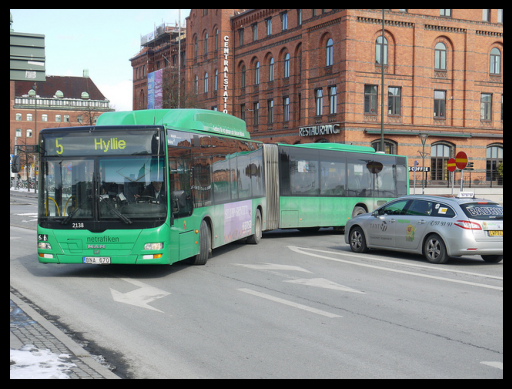

A green bus is turning in front of a grey car.
a green piggy back bus pulling in front of a car
A double long bus makes a turn through an intersection.
A large green bus turns left onto a street, at an intersection
a green and white bus a car and some buildings


In [23]:
import numpy as np
import skimage.io as io

ann_id = np.random.choice(image_ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

print(url)
image = io.imread(url)
plt.axis('off')
plt.imshow(image)
plt.show()

# load and display captions
annotation_ids = coco_caps.getAnnIds(imgIds=img['id'])
annotation = coco_caps.loadAnns(annotation_ids)
coco_caps.showAnns(annotation)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)